In [7]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [31]:
def load_path(series, path):
    print(f"load {path}");
    data = np.loadtxt(path, dtype="double")
    size = data[0, 0]
    if not np.all(data[:, 0] == size):
        print(f"ERROR, found bad size {path}")
        exit(1)
    mem = data[0, 2]
    if not np.all(data[:, 2] == mem):
        print(f"ERROR, found bad mem {path}")
        exit(1)
    avg_time = np.average(data[:, 1])
    print(f"{size} {mem} {avg_time}")
    series.append([math.sqrt(size), mem, avg_time])

In [33]:
pow_min = 5
pow_max = 10
#bases = [1, 3, 5, 7, 11, 13]
#bases = [1, 31]
bases = [4]
factors = [0.5, 0.2]
mm_in_data = []
mm_out_data = []
mm_hybrid_data_5 = []
mm_hybrid_data_2 = []
output_dir = "../data/macbook_run_02"
mm_t = 0;
for power in range(pow_min, pow_max + 1):
    for base in bases:
        timing_file = f"{output_dir}/p{power}_b{base}_t0.txt"
        load_path(mm_in_data, timing_file)

        timing_file = f"{output_dir}/p{power}_b{base}_t1.txt"
        load_path(mm_out_data, timing_file)

        timing_file = f"{output_dir}/p{power}_b{base}_t2_f0.5.txt"
        load_path(mm_hybrid_data_5, timing_file)

        timing_file = f"{output_dir}/p{power}_b{base}_t2_f0.2.txt"
        load_path(mm_hybrid_data_2, timing_file)
mm_in_data_np = np.array(mm_in_data, dtype="double")
mm_out_data_np = np.array(mm_out_data, dtype="double")
mm_hybrid_data_5_np = np.array(mm_hybrid_data_5, dtype="double")
mm_hybrid_data_2_np = np.array(mm_hybrid_data_2, dtype="double")

min_timing = mm_in_data_np[:,2].min()
max_timing = mm_in_data_np[:,2].max()

min_timing = min(mm_out_data_np[:,2].min(), min_timing)
max_timing = min(mm_out_data_np[:,2].max(), max_timing)

min_timing = min(mm_hybrid_data_5_np[:,2].min(), min_timing)
max_timing = min(mm_hybrid_data_5_np[:,2].max(), max_timing)

min_timing = min(mm_hybrid_data_2_np[:,2].min(), min_timing)
max_timing = min(mm_hybrid_data_2_np[:,2].max(), max_timing)
#mm_in_data_np = mm_in_data_np_t[mm_in_data_np_t[:, 0].argsort()]
#mm_out_data_np = mm_out_data_np_t[mm_out_data_np_t[:, 0].argsort()]

load ../data/macbook_run_02/p5_b4_t0.txt
16384.0 49152.0 0.0006000000000000001
load ../data/macbook_run_02/p5_b4_t1.txt
16384.0 557056.0 0.0008
load ../data/macbook_run_02/p5_b4_t2_f0.5.txt
16384.0 278528.0 0.0012000000000000001
load ../data/macbook_run_02/p5_b4_t2_f0.2.txt
16384.0 111360.0 0.0008
load ../data/macbook_run_02/p6_b4_t0.txt
65536.0 196608.0 0.0016
load ../data/macbook_run_02/p6_b4_t1.txt
65536.0 4325376.0 0.0044
load ../data/macbook_run_02/p6_b4_t2_f0.5.txt
65536.0 2162688.0 0.0054
load ../data/macbook_run_02/p6_b4_t2_f0.2.txt
65536.0 865024.0 0.0066
load ../data/macbook_run_02/p7_b4_t0.txt
262144.0 786432.0 0.011000000000000001
load ../data/macbook_run_02/p7_b4_t1.txt
262144.0 34078720.0 0.033800000000000004
load ../data/macbook_run_02/p7_b4_t2_f0.5.txt
262144.0 17039360.0 0.044399999999999995
load ../data/macbook_run_02/p7_b4_t2_f0.2.txt
262144.0 6815744.0 0.0518
load ../data/macbook_run_02/p8_b4_t0.txt
1048576.0 3145728.0 0.0806
load ../data/macbook_run_02/p8_b4_t1.txt

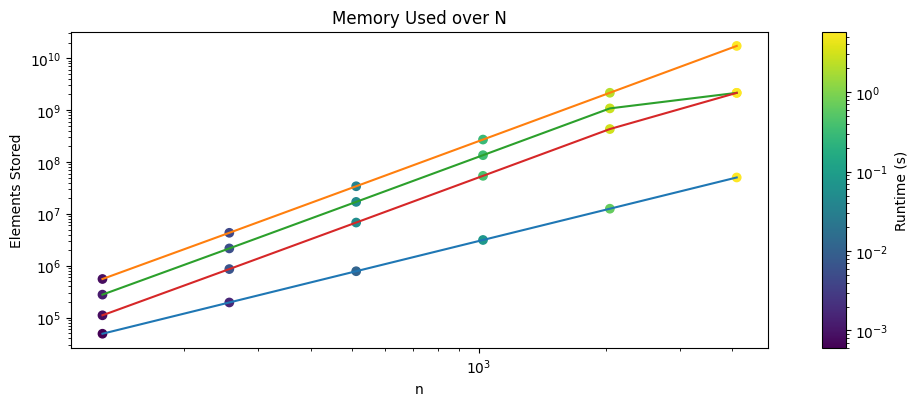

In [37]:
width = 10
height_ratio = 0.41114
fig = plt.figure(figsize=(width, width * height_ratio))
n_rows = 1
n_cols = 2
width_ratios = [3.0, 0.1]
height_ratios = [1.0]
gs1 = fig.add_gridspec(
    n_rows, n_cols,
    width_ratios = width_ratios, 
    height_ratios = height_ratios,
    wspace = 0.15,
    hspace = 0.15,
)
main_ax = fig.add_subplot(gs1[0, 0])
colorbar_ax = fig.add_subplot(gs1[0, 1])


main_ax.set_yscale('log')
main_ax.set_xscale('log')

main_ax.plot(mm_in_data_np[:,0], mm_in_data_np[:,1])
t1_scatter = main_ax.scatter(mm_in_data_np[:,0], mm_in_data_np[:,1],norm="log",c=mm_in_data_np[:,2], vmin=min_timing, vmax=max_timing)

main_ax.plot(mm_out_data_np[:,0], mm_out_data_np[:,1])
sp1 = main_ax.scatter(mm_out_data_np[:,0], mm_out_data_np[:,1],norm="log",c=mm_out_data_np[:,2], vmin=min_timing, vmax=max_timing)
#sp1.clim(min_timing, max_timing)

main_ax.plot(mm_hybrid_data_5_np[:,0], mm_hybrid_data_5_np[:,1])
sp2 = main_ax.scatter(mm_hybrid_data_5_np[:,0], mm_hybrid_data_5_np[:,1],norm="log",c=mm_hybrid_data_5_np[:,2], vmin=min_timing, vmax=max_timing)
#sp2.clim(min_timing, max_timing)

main_ax.plot(mm_hybrid_data_2_np[:,0], mm_hybrid_data_2_np[:,1])
sp3 = main_ax.scatter(mm_hybrid_data_2_np[:,0], mm_hybrid_data_2_np[:,1],norm="log",c=mm_hybrid_data_2_np[:,2], vmin=min_timing, vmax=max_timing)
#sp3.clim(min_timing, max_timing)

main_ax.set_xlabel("n")
main_ax.set_ylabel("Elements Stored")
main_ax.set_title("Memory Used over N")

fig.colorbar(
    t1_scatter, 
    cax=colorbar_ax,
    label = 'Runtime (s)',
)
plt.show()